<a href="https://colab.research.google.com/github/amankharwal/Website-data/blob/master/WhatsApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
startsWithDateAndTime('7/26/18, 22:51 - Bobby: This message was deleted')

True

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
from google.colab import files
uploaded = files.upload()
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'WhatsApp Chat (1).txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
2546,2020-06-08,12:09 am,Aman Kharwal,<Media omitted>
2547,2020-06-08,12:09 am,Aman Kharwal,The most used words in the group
2548,2020-06-08,12:10 am,Sahil Pansare,Haha Links n Aman are trending👻
2549,2020-06-08,12:10 am,Sahil Pansare,🤩
2550,2020-06-08,12:10 am,Aman Kharwal,😊
2551,2020-06-08,12:12 am,+91 86002 94761,Which plot is this?
2552,2020-06-08,12:14 am,Aman Kharwal,This is WordCloud
2553,2020-06-08,12:14 am,Aman Kharwal,The most frequent words are bigger
2554,2020-06-08,12:15 am,Aman Kharwal,<Media omitted>
2555,2020-06-08,12:15 am,Sahil Pansare,Testing 🤔


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1210 non-null   datetime64[ns]
 1   Time     1210 non-null   object        
 2   Author   1028 non-null   object        
 3   Message  1210 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 37.9+ KB


In [ ]:
df.Author.unique()

array([None, 'Aman Kharwal', 'Sahil Pansare', '+91 97386 30266',
       '+91 97217 95958', '+91 83696 21916', '+91 88064 51751',
       '+91 96627 78558', '+91 90252 51204', '+91 70665 40498',
       '+91 84471 85093', '+91 79065 56743', '+60 11-5689 2040',
       '+91 99150 15281', '+91 93983 18393', '+91 95612 77706',
       '+91 98224 35433', '+91 98673 74287', '+91 74474 80190',
       '+91 87288 48041', '+91 86106 90461', '+91 76200 14058',
       '+91 98507 34912', '+91 77868 68987', '+91 77387 12804',
       '+91 98119 14741', '+91 99724 91453', '+91 70382 50701',
       '+91 83448 26314', '+91 95000 28536', '+91 93703 49063',
       '+91 93808 22645', '+91 99165 66683', '+91 70424 73460', 'Sumehar',
       '+91 86002 94761'], dtype=object)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 2 to 2565
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2201 non-null   datetime64[ns]
 1   Time     2201 non-null   object        
 2   Author   2201 non-null   object        
 3   Message  2201 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 86.0+ KB


In [ ]:
total_messages = df.shape[0]
print(total_messages)

2201


In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

470


In [ ]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [ ]:
emojis = sum(df['emoji'].str.len())
print(emojis)

613


In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [ ]:
links = np.sum(df.urlcount)

In [ ]:
print("Data science Community")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Data science Community
Messages: 2201
Media: 470
Emojis: 613
Links: 437


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [ ]:
messages_df = df.drop(media_messages_df.index)

In [ ]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 2 to 2565
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1731 non-null   datetime64[ns]
 1   Time      1731 non-null   object        
 2   Author    1731 non-null   object        
 3   Message   1731 non-null   object        
 4   emoji     1731 non-null   object        
 5   urlcount  1731 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 94.7+ KB


In [ ]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [ ]:
messages_df.tail(20)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
2544,2020-06-08,12:06 am,+91 99165 66683,Oh neat. What package are you using to get this?,[],0,48,10,1
2545,2020-06-08,12:08 am,Aman Kharwal,This is done with basic python,[],0,30,6,1
2547,2020-06-08,12:09 am,Aman Kharwal,The most used words in the group,[],0,32,7,1
2548,2020-06-08,12:10 am,Sahil Pansare,Haha Links n Aman are trending👻,[👻],0,31,6,1
2549,2020-06-08,12:10 am,Sahil Pansare,🤩,[🤩],0,1,1,1
2550,2020-06-08,12:10 am,Aman Kharwal,😊,[😊],0,1,1,1
2551,2020-06-08,12:12 am,+91 86002 94761,Which plot is this?,[],0,19,4,1
2552,2020-06-08,12:14 am,Aman Kharwal,This is WordCloud,[],0,17,3,1
2553,2020-06-08,12:14 am,Aman Kharwal,The most frequent words are bigger,[],0,34,6,1
2555,2020-06-08,12:15 am,Sahil Pansare,Testing 🤔,[🤔],0,9,2,1


In [ ]:
l = ["Aman Kharwal", "Sahil Pansare", "Sumehar"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()


Stats of Aman Kharwal -
Messages Sent 431
Words per message 5.907192575406032
Media Messages Sent 17
Emojis Sent 83
Links Sent 245

Stats of Sahil Pansare -
Messages Sent 306
Words per message 20.81045751633987
Media Messages Sent 12
Emojis Sent 195
Links Sent 52

Stats of Sumehar -
Messages Sent 52
Words per message 4.826923076923077
Media Messages Sent 0
Emojis Sent 8
Links Sent 0



In [ ]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

44


In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('👍🏻', 118)
('😊', 81)
('💯', 60)
('🤝', 39)
('👌🏿', 28)
('👍🏽', 28)
('👌', 24)
('👏🏾', 20)
('😂', 16)
('‼️', 16)
('👉', 16)
('⭐', 12)
('👍🏼', 12)
('👍', 12)
('✌🏻', 8)
('✌️', 8)
('😅', 8)
('🌹', 8)
('\U0001f973', 8)
('😇', 8)
('😉', 6)
('🙌🏻', 6)
('\U0001f929', 5)
('😄', 4)
('😶', 4)
('☕', 4)
('\U0001f9e1', 4)
('\U0001f91f🏻', 4)
('🙂', 4)
('👏', 4)
('🔔', 4)
('✨', 4)
('😬', 4)
('👌🏾', 4)
('😍', 4)
('❤', 4)
('🙏🏻', 3)
('🤣', 3)
('🔥', 2)
('👻', 2)
('😁', 1)
('👏🏻', 1)
('🙌', 1)
('🤔', 1)


In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,👍🏻,118
1,😊,81
2,💯,60
3,🤝,39
4,👌🏿,28
5,👍🏽,28
6,👌,24
7,👏🏾,20
8,😂,16
9,‼️,16


In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 160610 words in all the messages.


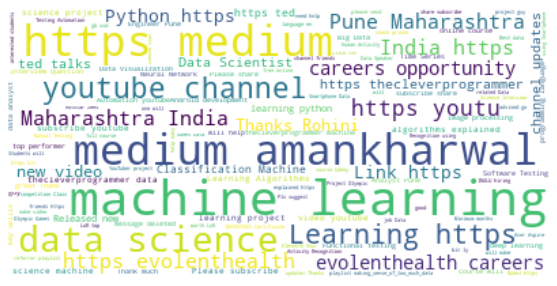

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Aman Kharwal


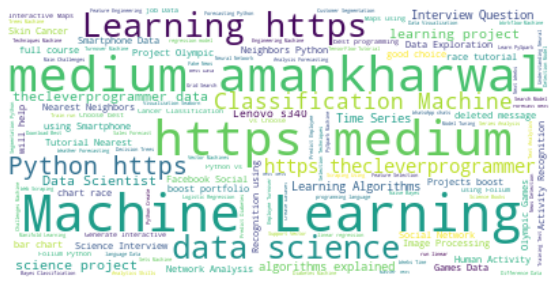

Author name Sahil Pansare


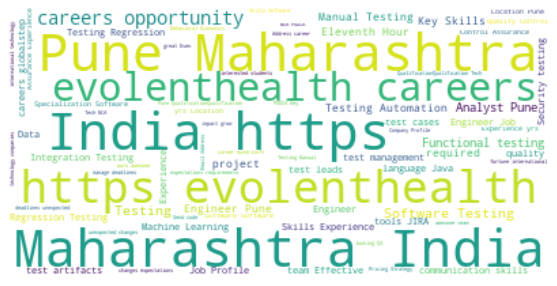

Author name Sumehar


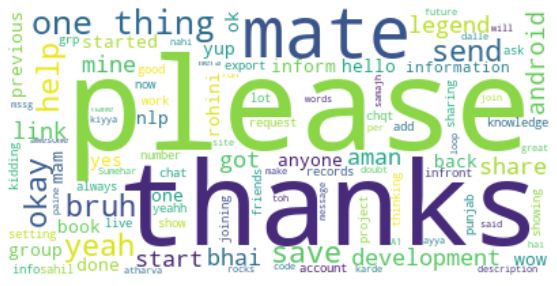

In [ ]:
l = ["Aman Kharwal", "Sahil Pansare", "Sumehar"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()